In [1]:
import warnings
import pandas as pd
from pycaret.classification import *

seed = 1
warnings.filterwarnings("ignore")

In [2]:
df_training = pd.read_parquet("training_01.parquet")

In [7]:
df_training = df_training.sample(n=500_000, random_state=seed)
df_training.label.mean()

0.031756

In [8]:
setup_params = {
    "target": "label",
    "numeric_features": list(df_training.columns[1:-1]),
    "categorical_features": ["within_budget"],
    "silent": True,
    "fold" : 3,
    "session_id": seed,
    "preprocess": False,
    "data": df_training
}

prep = setup(**setup_params)

,Description,Value
0,session_id,1
1,Target,label
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(500000, 17)"
5,Missing Values,0
6,Numeric Features,15
7,Categorical Features,1
8,Transformed Train Set,"(349999, 16)"
9,Transformed Test Set,"(150001, 16)"


In [9]:
best_models = compare_models(
    sort="AUC", 
    n_select=5
    )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9683,0.7307,0.0118,0.5642,0.0231,0.0218,0.0779,15.2000
gbc,Gradient Boosting Classifier,0.9682,0.7157,0.0001,0.0417,0.0002,0.0001,0.0015,28.3333
ada,Ada Boost Classifier,0.9682,0.7050,0.0000,0.0000,0.0000,0.0000,0.0000,13.1467
nb,Naive Bayes,0.7528,0.6981,0.4900,0.0631,0.1118,0.0589,0.1023,1.5633
lda,Linear Discriminant Analysis,0.9682,0.6937,0.0000,0.0000,0.0000,0.0000,0.0000,2.1167
rf,Random Forest Classifier,0.9682,0.6872,0.0058,0.4239,0.0115,0.0107,0.0468,22.6700
et,Extra Trees Classifier,0.9668,0.6776,0.0116,0.1706,0.0217,0.0178,0.0368,18.2333
lr,Logistic Regression,0.9682,0.6718,0.0000,0.0000,0.0000,0.0000,0.0000,17.0467
knn,K Neighbors Classifier,0.9674,0.5336,0.0022,0.0682,0.0044,0.0024,0.0068,4.8500
dt,Decision Tree Classifier,0.9335,0.5315,0.1022,0.0788,0.0890,0.0551,0.0556,2.9767


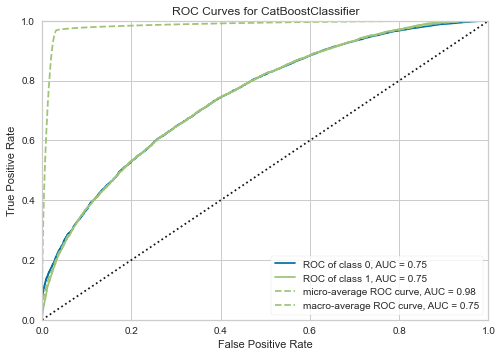

In [10]:
plot_model(estimator=best_models[0], plot="auc")

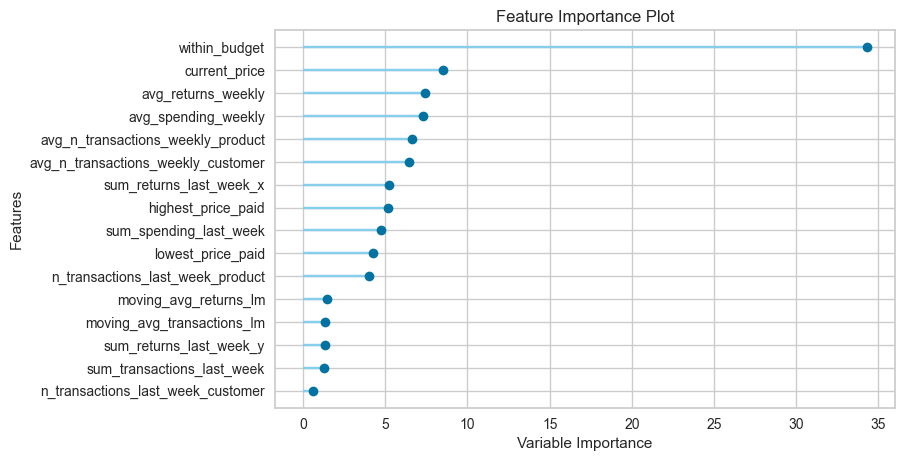

In [17]:
plot_model(estimator=best_models[0], plot="feature_all")